## Problem 1

In this homework problem, you are going to use `tensorflow-probability` to deal with an unfair dice, i.e., a dice that has different probability of settling with each of the face 1 to 6 facing up, instead of the $p=1/6$ equal probability in the case of a fair dice.

You are provided with 5000 data entries of this dice. Each entry is a length-6 vector with one element being 1 and 0 for the rest. For example, $[0,1,0,0,0,0]$ means the "2" face of this dice landed facing up. This form is also the data form generated by `tfp.distribution.Bernoulli` when you feed multiple probability to it.

You are going to estimate the 6 probabilities describing this unfair dice (6 face). $\tilde{p} = [p1,p2,p3,p4,p5,p6]$. Keep in mind that they sum up to 1.

*Your solution here*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#%tensorflow_version 2.x
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
#tfe = tf.contrib.eager
#tf.enable_eager_execution()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
path = "/content/drive/MyDrive/semester 2/AM216/HW5" # Your path here
os.chdir(path)

Mounted at /content/drive


In [5]:
unfair_dice = np.loadtxt("unfair_dice")
unfair_dice.shape
unfair_dice[1]

array([0., 0., 1., 0., 0., 0.])

In [6]:
p = tf.constant(1/6)
dice_MLE = tfp.distributions.Bernoulli(probs=[p,p,p,p,p,p], dtype=tf.float32)
dice_MLE.sample(4) # can we have more than 1 up

<tf.Tensor: shape=(4, 6), dtype=float32, numpy=
array([[0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0.]], dtype=float32)>

In [7]:
# MLE: maximizing log P(data|p)

sum = 0
for i in range(6):
  p_guess = tf.constant(1/6)
  learning_rate = 0.01
  norm_grad = 1.0
  save_gradients = []
  # all should have the same guess 
  p_guesses = [p_guess]
  while norm_grad> 0.001:
    with tf.GradientTape() as tape:
      tape.watch(p_guess)

      # Define likelihood distribution
      dice_MLE = tfp.distributions.Bernoulli(probs=p_guess, dtype=tf.float32)

      # Define loss
      loss_MLE = tf.reduce_mean(dice_MLE.log_prob(unfair_dice[:,i]))  # loglikelihood: #HEADS*logP + #Tails*log(1-p)

      # Take gradient 
      grads = tape.gradient(loss_MLE, p_guess)
      norm_grad = np.abs(grads.numpy())
    p_guess += learning_rate*grads  # note that we do gradient "ascent" here (maximize logP(data|p))
    p_guesses.append(p_guess)
    save_gradients.append(norm_grad)

  print(f'P_MLE for side {i+1} ', p_guess.numpy())
  sum += p_guess.numpy()
print("total sum", sum) # when using .65 it goes above 1

P_MLE for side 1  0.049036235
P_MLE for side 2  0.099072024
P_MLE for side 3  0.1461111
P_MLE for side 4  0.44836858
P_MLE for side 5  0.050836626
P_MLE for side 6  0.20644794
total sum 0.9998725093901157


### (2) Use MAP to estimate $\tilde{p}$. Selecte three different prior distribution (if the distribution is parametrized, select three different enough parameters). Using 5000 sample, compare which prior gives the best estimation of why.

[Hint: If the optimization takes too long, try to run a certain amount of steps instead of setting a criteria for the gradient. Check the remaining gradient and determine whether to increase the number of steps]

In [8]:
ps = np.linspace(0, 1, 100)
beta_prior_2 = tfp.distributions.Beta(10., 2.)
beta_prior_2.prob(ps)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.00000000e+00, 1.19197653e-16, 6.04062969e-14, 2.29828331e-12,
       3.02903501e-11, 2.23305402e-10, 1.13994580e-09, 4.51554394e-09,
       1.48556270e-08, 4.24097628e-08, 1.08250866e-07, 2.52381824e-07,
       5.45997523e-07, 1.10925112e-06, 2.13605472e-06, 3.92773472e-06,
       6.93743050e-06, 1.18275566e-05, 1.95424363e-05, 3.13988276e-05,
       4.91968676e-05, 7.53544809e-05, 1.13066875e-04, 1.66496582e-04,
       2.40992493e-04, 3.43346532e-04, 4.82084521e-04, 6.67801476e-04,
       9.13526223e-04, 1.23515364e-03, 1.65189162e-03, 2.18677777e-03,
       2.86724837e-03, 3.72572057e-03, 4.80025820e-03, 6.13526301e-03,
       7.78223062e-03, 9.80049558e-03, 1.22580873e-02, 1.52325835e-02,
       1.88118983e-02, 2.30952930e-02, 2.81941779e-02, 3.42330001e-02,
       4.13502008e-02, 4.96989526e-02, 5.94479702e-02, 7.07823485e-02,
       8.39039087e-02, 9.90319699e-02, 1.16403691e-01, 1.36274114e-01,
       1.58916399e-01, 1.8462

*Your solution here*

Text(0, 0.5, 'pdf')

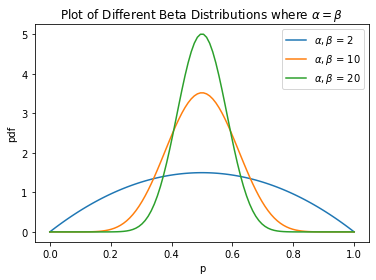

In [9]:
ps = np.linspace(0, 1, 100)
plt.figure(figsize=(6,4))
beta_prior_2 = tfp.distributions.Beta(2., 2.)
beta_prior_10 = tfp.distributions.Beta(10., 10.)
beta_prior_20 = tfp.distributions.Beta(20., 20.)
p_2 = beta_prior_2.prob(ps)
p_10 = beta_prior_10.prob(ps)
p_20 = beta_prior_20.prob(ps)

plt.plot(ps, p_2, label=r'$\alpha, \beta$ = 2')
plt.plot(ps, p_10, label=r'$\alpha, \beta$ = 10')
plt.plot(ps, p_20, label=r'$\alpha, \beta$ = 20')
plt.title(r"Plot of Different Beta Distributions where $\alpha = \beta$")
plt.legend()
plt.xlabel('p')
plt.ylabel('pdf')


Text(0, 0.5, 'pdf')

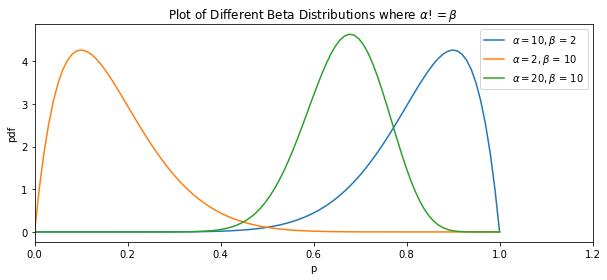

In [10]:
ps = np.linspace(0, 1, 100)
plt.figure(figsize=(10,4))
beta_prior_10_2 = tfp.distributions.Beta(10., 2.)
beta_prior_2_10 = tfp.distributions.Beta(2., 10.)
beta_prior_20_10 = tfp.distributions.Beta(20., 10.)
p_10_2 = beta_prior_10_2.prob(ps)
p_2_10 = beta_prior_2_10.prob(ps)
p_20_10 = beta_prior_20_10.prob(ps)
plt.plot(ps, p_10_2, label=r'$\alpha =10, \beta$ = 2')
plt.plot(ps, p_2_10, label=r'$\alpha=2, \beta$ = 10')
plt.plot(ps, p_20_10, label=r'$\alpha = 20, \beta$ = 10')
plt.title(r"Plot of Different Beta Distributions where $\alpha != \beta$")
plt.legend()
plt.xlim(0,1.2)
plt.xlabel('p')
plt.ylabel('pdf')

In [40]:
def MAP_values(p_guess, i):
  stored = []
  for hyperparam in [2.,10.,20.]:
    nsamples = len(unfair_dice)
    learning_rate = 0.01
    norm_grad = 1.0
    save_gradients=[]
    p_guesses = [p_guess]
    count = 0
    while norm_grad> 0.001:
      with tf.GradientTape() as tape:
        tape.watch(p_guess)

        # Define prior distribution
        beta_prior = tfp.distributions.Beta(hyperparam, hyperparam)

        # Define likelihood distribution
        dice_MAP = tfp.distributions.Bernoulli(probs=p_guess, dtype=tf.float32)

        # Define MAP loss: likelihood + prior
        loss_MAP = (tf.reduce_sum(dice_MAP.log_prob(unfair_dice[:,i])) + \
                    beta_prior.log_prob(p_guess)) / nsamples

        # Take gradient
        grads = tape.gradient(loss_MAP, p_guess)
        count += 1
        norm_grad = np.abs(grads.numpy())
        #if count % 1000 == 0: # want to see the iterations inputted
          #print(count, norm_grad)
      p_guess += learning_rate*grads
      save_gradients.append(norm_grad)
    
    print(f'hyperparameter {hyperparam} \t p_MAP {p_guess.numpy()}')
    stored.append(p_guess.numpy())
  return stored
   # plt.title(f"Plot of saved gradients for side {i+1}")
   # plt.plot(save_gradients)

In [41]:
print("Map values for side 1")
stored1 = MAP_values(tf.constant(1/6),0)

Map values for side 1
hyperparameter 2.0 	 p_MAP 0.049209412187337875
hyperparameter 10.0 	 p_MAP 0.05058564990758896
hyperparameter 20.0 	 p_MAP 0.05236482992768288


In [43]:
print("Map values for side 2")
stored2 = MAP_values(tf.constant(1/6),1)

Map values for side 2
hyperparameter 2.0 	 p_MAP 0.09923259168863297
hyperparameter 10.0 	 p_MAP 0.10035893321037292
hyperparameter 20.0 	 p_MAP 0.10194532573223114


In [44]:
print("Map values for side 3")
stored3 = MAP_values(tf.constant(1/6),2)

Map values for side 3
hyperparameter 2.0 	 p_MAP 0.14625203609466553
hyperparameter 10.0 	 p_MAP 0.1471630185842514
hyperparameter 20.0 	 p_MAP 0.1485559344291687


In [45]:
print("Map values for side 4")
stored4 =MAP_values(tf.constant(1/6),3)

Map values for side 4
hyperparameter 2.0 	 p_MAP 0.44838976860046387
hyperparameter 10.0 	 p_MAP 0.4485540986061096
hyperparameter 20.0 	 p_MAP 0.44875532388687134


In [46]:
print("Map values for side 5")
stored5 = MAP_values(tf.constant(1/6),4)

Map values for side 5
hyperparameter 2.0 	 p_MAP 0.05101695656776428
hyperparameter 10.0 	 p_MAP 0.05237480252981186
hyperparameter 20.0 	 p_MAP 0.05415424332022667


In [47]:
print("Map values for side 6")
stored6 =MAP_values(tf.constant(1/6),5)

Map values for side 6
hyperparameter 2.0 	 p_MAP 0.20656487345695496
hyperparameter 10.0 	 p_MAP 0.20750781893730164
hyperparameter 20.0 	 p_MAP 0.2086600512266159


In [50]:
dice = [stored1, stored2, stored3, stored4, stored5, stored6]
sum1, sum2, sum3 = 0,0,0
for i in range(6):
  sum1 += dice[i][0]
  sum2 += dice[i][1]
  sum3 += dice[i][2]

print(f"Sum of hyperparamater 2.0 p_map values across all 6 sides {sum1}")
print(f"Sum of hyperparamater 10.0 p_map values across all 6 sides {sum2}")
print(f"Sum of hyperparamater 20.0 p_map values across all 6 sides {sum3}")

Sum of hyperparamater 2.0 p_map values across all 6 sides 1.0006656385958195
Sum of hyperparamater 10.0 p_map values across all 6 sides 1.0065443217754364
Sum of hyperparamater 20.0 p_map values across all 6 sides 1.0144357085227966


### (3) Using Monte-Carlo sampling, generate posterial samples and estimate the 6 probabilities again.

*Your solution here*

In [52]:
def unnormalized_log_prob(data, alpha_guess,beta_guess):
  dist_guess = tfd.Beta(alpha_guess,beta_guess)
  return tf.reduce_mean(dist_guess.log_prob(data))

# Run the chain (with burn-in).
@tf.function
def run_chain():
  # Run the chain (with burn-in).
  samples_hmc, [step_size, log_accept_ratio,is_accepted] = tfp.mcmc.sample_chain(
      num_results=num_results,
      num_burnin_steps=num_burnin_steps,
      current_state=initial_chain_state,
      kernel=adaptive_hmc,
      trace_fn=lambda _, pkr: [pkr.inner_results.accepted_results.step_size,
                             pkr.inner_results.log_accept_ratio, pkr.inner_results.is_accepted])
      #trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

  sample_mean = tf.reduce_mean(samples_hmc)
  sample_stddev = tf.math.reduce_std(samples_hmc)
  #is_accepted = tf.reduce_mean(tf.cast(is_accepted, dtype=tf.float32))
  return samples_hmc, [step_size, log_accept_ratio,is_accepted]

# Define a closure over our joint_log_prob.
sum = 0
for i in range(6):
  print("Dice Side",i+1)
  hmc_unnormalized_log_prob = lambda a,b: unnormalized_log_prob(unfair_dice[:,i], a,b)

  initial_chain_state = [
      tf.constant(4.0, name='alpha'),
      tf.constant(1.0, name='beta'),
  ]
  step_sizes = [
                tf.constant(0.01),
                tf.constant(0.01)
  ]
  # Initialize the HMC transition kernel
  num_results = int(10e3)
  num_burnin_steps = int(10e3)
  adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
      tfp.mcmc.HamiltonianMonteCarlo(
          target_log_prob_fn=hmc_unnormalized_log_prob,
          num_leapfrog_steps=3,
          step_size=step_sizes),
      num_adaptation_steps=int(num_burnin_steps * 0.008))
    


  output_data, [step_size,log_accept_ratio,is_accepted]= run_chain()
  a_t,b_t=output_data
  #MAP
  nsamples = len(unfair_dice)
  learning_rate = 0.01
  norm_grad = 1.0
  save_gradients=[]
  p_guesses = [p_guess]
  count = 0
  
  while norm_grad> 0.001:
    with tf.GradientTape() as tape:
      tape.watch(p_guess)

      # Define prior distribution
      beta_prior = tfp.distributions.Beta(a_t[-1], b_t[-1])

      # Define likelihood distribution
      dice_MAP = tfp.distributions.Bernoulli(probs=p_guess, dtype=tf.float32)

      # Define MAP loss: likelihood + prior
      loss_MAP = (tf.reduce_sum(dice_MAP.log_prob(unfair_dice[:,i])) + \
                  beta_prior.log_prob(p_guess)) / nsamples

      # Take gradient
      grads = tape.gradient(loss_MAP, p_guess)
      norm_grad = np.abs(grads.numpy())
      #if count % 1000 == 0: # want to see the iterations inputted
       # print(count, norm_grad)
    p_guess += learning_rate*grads
    save_gradients.append(norm_grad)
  print(f'alpha {a_t[-1]}, beta {a_t[-1]} \t p_MAP {p_guess.numpy()}')
  sum += p_guess.numpy()
  print()
print("Total sum", sum)

Dice Side 1
alpha 4.0, beta 4.0 	 p_MAP 0.049604013562202454

Dice Side 2
alpha 4.0, beta 4.0 	 p_MAP 0.09946147352457047

Dice Side 3
alpha 4.0, beta 4.0 	 p_MAP 0.1464017927646637

Dice Side 4
alpha 4.0, beta 4.0 	 p_MAP 0.4487013816833496

Dice Side 5
alpha 4.0, beta 4.0 	 p_MAP 0.05140630528330803

Dice Side 6
alpha 4.0, beta 4.0 	 p_MAP 0.20692220330238342

Total sum 1.0024971701204777
